# Part 2: Clustering (DSFS Chapter 19)

In [1]:
import csv # get the csv reader
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from IPython.display import Image
from sklearn.cluster import KMeans
import numpy as np
import json

In [2]:
data=pd.read_csv("../week4/SFPD_Incidents_-_from_1_January_2003.csv")

In [14]:
#Create a dataframe with the required info of coordinates of prostitution.
DataProstitution=data[data["Category"]=="PROSTITUTION"]
DataProstitution=DataProstitution.filter(items=["X","Y"])
DataProstitution = DataProstitution[DataProstitution["Y"]!=90]
DataProstitutionKmeans=DataProstitution.filter(items=['X', 'Y'])
DataProstitutionKmeans.head()

,X,Y
3678,-122.466205,37.772541
5470,-122.403405,37.775421
6109,-122.485039,37.761291
6919,-122.409661,37.786439
7624,-122.417956,37.757880


In [8]:
# Converting to numpy array.
DataProstitutionKmeansArray=np.array(DataProstitutionKmeans)

In [15]:
# Concat all the dataframes together to create the csv file.
DataProstitutionKmeans=DataProstitution.filter(items=['X', 'Y'])

kmeans2 = KMeans(n_clusters=2, random_state=0).fit_predict(DataProstitutionKmeansArray)
df2=pd.DataFrame(kmeans2)
df2=df2.rename(columns = {0:'k2'})

kmeans3 = KMeans(n_clusters=3, random_state=0).fit_predict(DataProstitutionKmeansArray)
df3=pd.DataFrame(kmeans3)
df3=df3.rename(columns = {0:'k3'})

kmeans4 = KMeans(n_clusters=4, random_state=0).fit_predict(DataProstitutionKmeansArray)
df4=pd.DataFrame(kmeans4)
df4=df4.rename(columns = {0:'k4'})

kmeans5 = KMeans(n_clusters=5, random_state=0).fit_predict(DataProstitutionKmeansArray)
df5=pd.DataFrame(kmeans5)
df5=df5.rename(columns = {0:'k5'})

kmeans6 = KMeans(n_clusters=6, random_state=0).fit_predict(DataProstitutionKmeansArray)
df6=pd.DataFrame(kmeans6)
df6=df6.rename(columns = {0:'k6'})

result = pd.concat([DataProstitution.reset_index(drop=True),df2, df3,df4,df5,df6], axis=1)
result.reset_index(drop=True)
# write the results to a scv file
result.to_csv(path_or_buf="./PointsAndClusters.csv",index=False)

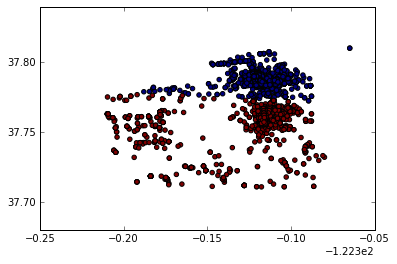

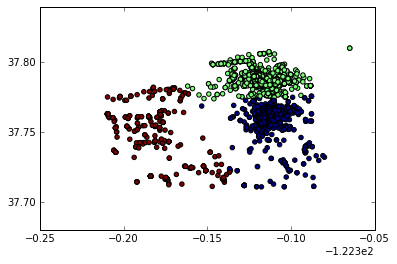

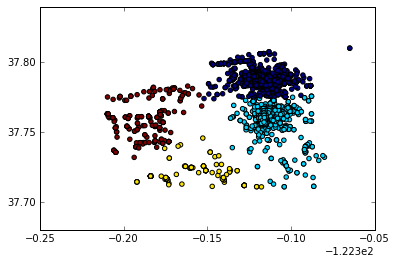

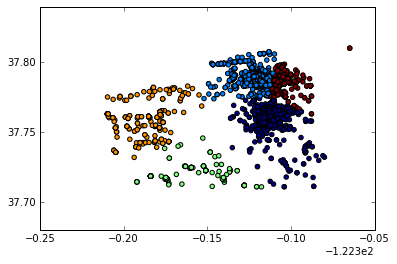

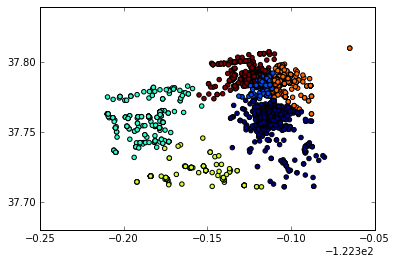

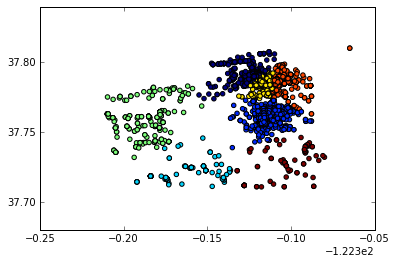

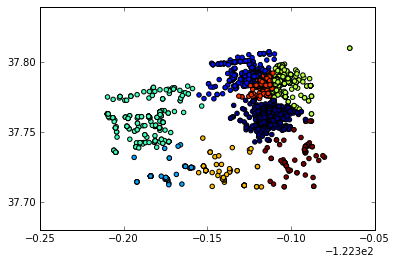

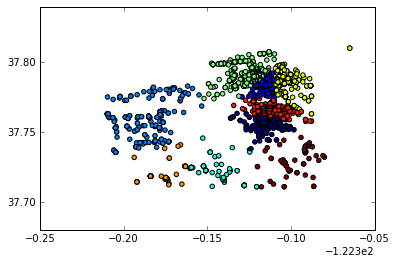

In [16]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit_predict(DataProstitutionKmeansArray)
    plt.scatter(DataProstitutionKmeansArray[:, 0], DataProstitutionKmeansArray[:, 1], c=kmeans)
    plt.show()

In [17]:
# Writing the coordinates of centroids to a json file.
centroids=[]
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(DataProstitutionKmeansArray)
    centroids.append(kmeans.cluster_centers_)
    
centroids = [[list(el) for el in list(i)] for i in centroids]
centroids_dict = {"k%d" %(i+2): el for i,el in enumerate(centroids)}
with open('jsondataCentroids.json','w') as f:
    json.dump(centroids_dict,f)